<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 9th exercise: <font color="#C70039">Interpretable Machine Learning by means of Partial Dependence (PDP) and Individual Conditional Expectation (ICE) Plots</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Student: Nicolas Rehbach
* Matriculation Number: 11133387
* Date:  04.12.2022

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_003.png" style="float: center;" width="800">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too.
* This applies to all exercises throughout this course.

---------------------------------

### <font color="ce33ff">DESCRIPTION</font>:

Partial dependence plots (PDP) and individual conditional expectation (ICE) plots can be used to visualize and analyze the interaction between the target response and a set of input features of interest.
Both PDPs [H2009] and ICEs [G2015] assume that the input features of interest are independent from the complement features and this assumption is often violated in practice. Thus, in the case of correlated features, we will create absurd data points to compute the PDP/ICE.

[H2009]
T. Hastie, R. Tibshirani and J. Friedman, The Elements of Statistical Learning, Second Edition, Section 10.13.2, Springer, 2009.

[G2015]
A. Goldstein, A. Kapelner, J. Bleich, and E. Pitkin, “Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation” Journal of Computational and Graphical Statistics, 24(1): 44-65, Springer, 2015.

---------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * try to follow the interpretations by printing out the decision tree and look for the feature patterns that the PDPs indicate.

**PART I**<br>
4. download an interesting data set from Kaggle and do the preprocessing.<br>
5. change the classifier according to the data set. The more blackbox the better.<br>
6. use PDP to identify the most relevant features explaining the target response of the data set.<br> 
7. comment your entire code and your findings.<br>  

**PART II**<br>
8. use the data set and the classifer from steps 4 and 5<br>
9. plot ICE curves with parameter (kind='both'<br>)
10. comment your entire code and your findings.<br>  

---------------------------------

# <font color="ce33ff">PART I (Partial Dependence Plots)</font>

## Imports
Import all necessary python utilities.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

#import warnings 
#warnings.filterwarnings('ignore')

## Load data set

In [2]:
data = pd.read_csv('./data/FIFA/FIFA.Statistics.2018.csv')
data.head(3)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN


In [3]:
# all features are:
print(data.columns.tolist())

['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time']


## Preprocessing


In [4]:
# Convert from string “Yes”/”No” to binary
y = (data['Man of the Match'] == 'Yes') 

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]

x = data[feature_names]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Goal Scored             128 non-null    int64
 1   Ball Possession %       128 non-null    int64
 2   Attempts                128 non-null    int64
 3   On-Target               128 non-null    int64
 4   Off-Target              128 non-null    int64
 5   Blocked                 128 non-null    int64
 6   Corners                 128 non-null    int64
 7   Offsides                128 non-null    int64
 8   Free Kicks              128 non-null    int64
 9   Saves                   128 non-null    int64
 10  Pass Accuracy %         128 non-null    int64
 11  Passes                  128 non-null    int64
 12  Distance Covered (Kms)  128 non-null    int64
 13  Fouls Committed         128 non-null    int64
 14  Yellow Card             128 non-null    int64
 15  Yellow & Red           

In [6]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 128 entries, 0 to 127
Series name: Man of the Match
Non-Null Count  Dtype
--------------  -----
128 non-null    bool 
dtypes: bool(1)
memory usage: 256.0 bytes


## Train the classifier

Start with a simple decision tree model.

In [7]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_x, train_y)

## Partial Dependence Plots (PDP)

<font color=red>Note:</font> The calculation of a partial dependence can happen obviously, only after a model has been trained. 

### Personal understanding PDP 

Based on: [link]('https://www.youtube.com/watch?v=J3UpVJKluvA')
- Black box models are popular but difficult to understand
- Key question -> how do changes in the variables influence the model prediction?
- Importance Rankings are useful but: they tell us which variables drives the model prediction but not the functional relationship between the variables and the predictions.

- PD Plots tell us how the model makes decision
- Depict a functional relationship between model inputs and the predictions
- They show how the model's predictions partially depend on the input variables
- Why partial? Because they show how the models predictions partially depend on the input variables
    - How does the model respond if we increase or decrease x?
- Overlaying PDP Functions can help us to choose models which are not only accurate but understandable

Genrally: (Lecture)
- $x_s$ are the features which the PD function should plot and $x_c$ are the other features used in the model
- Usually only one or two features in the set S, since higher dimensions are impossible to visualize / perceive as a human
- Features in S are those which we want to know the effect of prediction. The feature vectors and combined maked up the total feature space x

Example: How does temperature affect the prediction of the number of rented bikes?
- $x_s$ = Temperature
- $x_c$ = workingday, season, weathersit

Now we intuitively set all of our temperature columns to 0, calculate the predicted probability for all the data points and take the average. The outcome: How high is the rental rate averaged at the temperature 0?
Next, we artificially set the temperature to 1, 2, 3 etc. We will get many average predicted probabilities. Now we can plot the temperature against the average probabilities, which shows how the temperature influences the number of rented bikes.

Disadvantages:
- Assumes that our features are independent!
- We probably create Datasets which are impossible in the real world -> 0 degree in summer?
- We use averages of inprobable artifically created data

In [8]:
feature_names

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

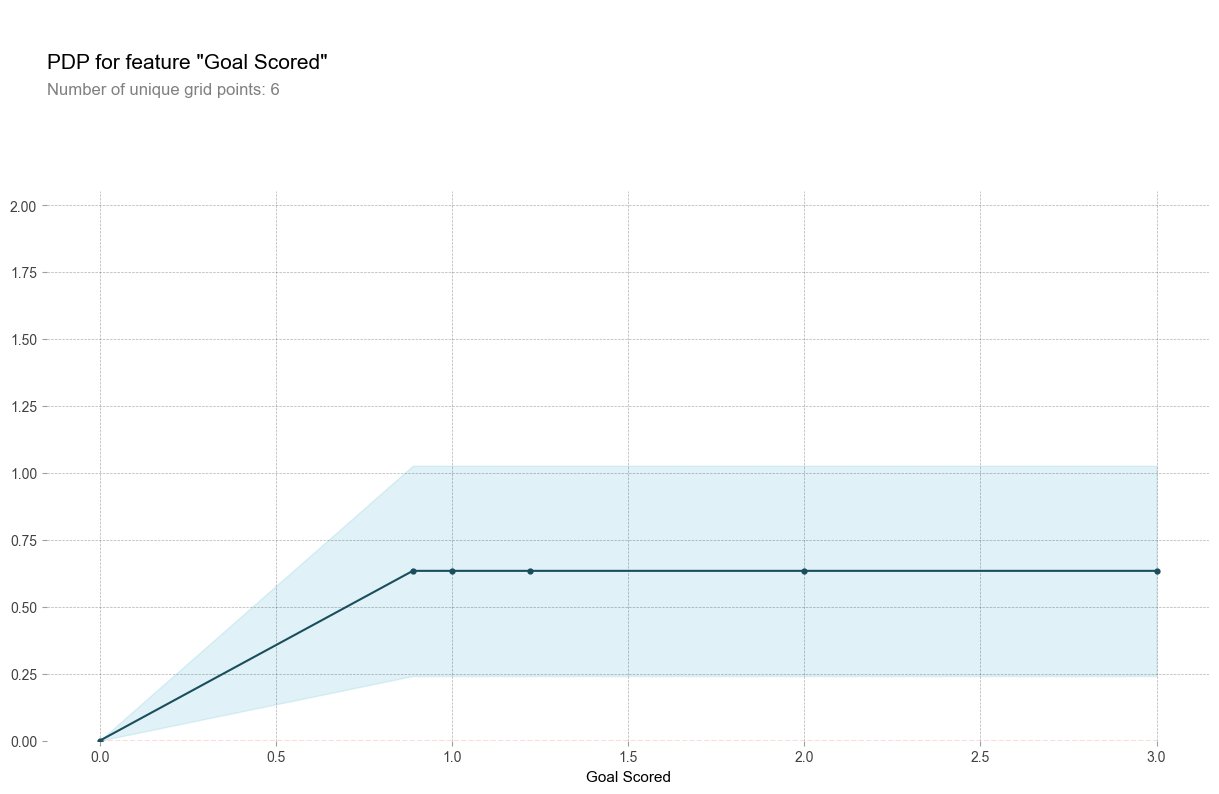

In [9]:
# Create the data to be plotted
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_x, model_features=feature_names, feature='Goal Scored')
# plot PDP for feature 'Goal Scored'
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show( )

A few items are worth pointing out for interpreting this plot.

The y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.
A nice PDP plot feature, when using the PDPBox package, is that the plot shows the confidence interval by the light blue shade.

From this particular graph you can interpret, that scoring one goal substantially increases the chances of winning "Man of The Match." 
But extra goals beyond that show little to no impact on predictions.

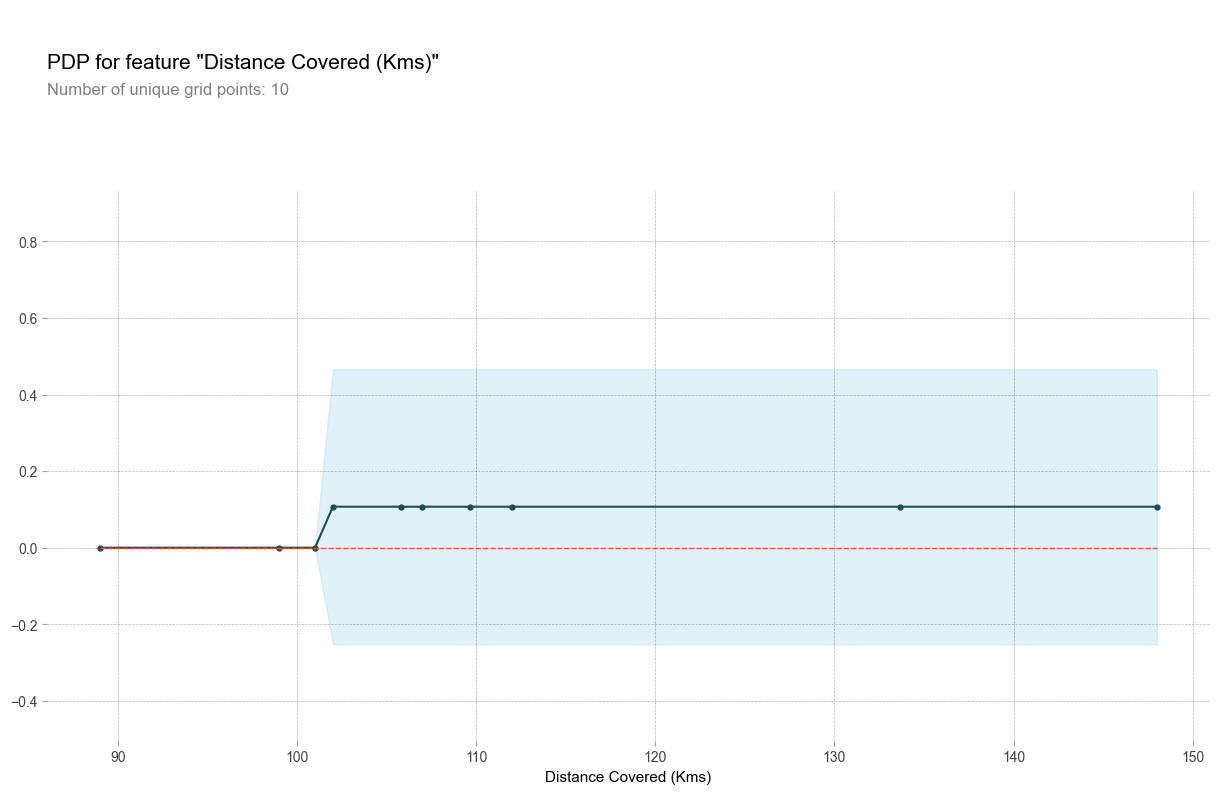

In [10]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_x, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

This PDP plot seems to be too simple to represent reality. 
Maybe that's because the model is so simple. Print the decision tree to compare that finding to the decision tree structure.
For the purpose of 
Let's back up our theory and do the same plot with a Random Forest model.

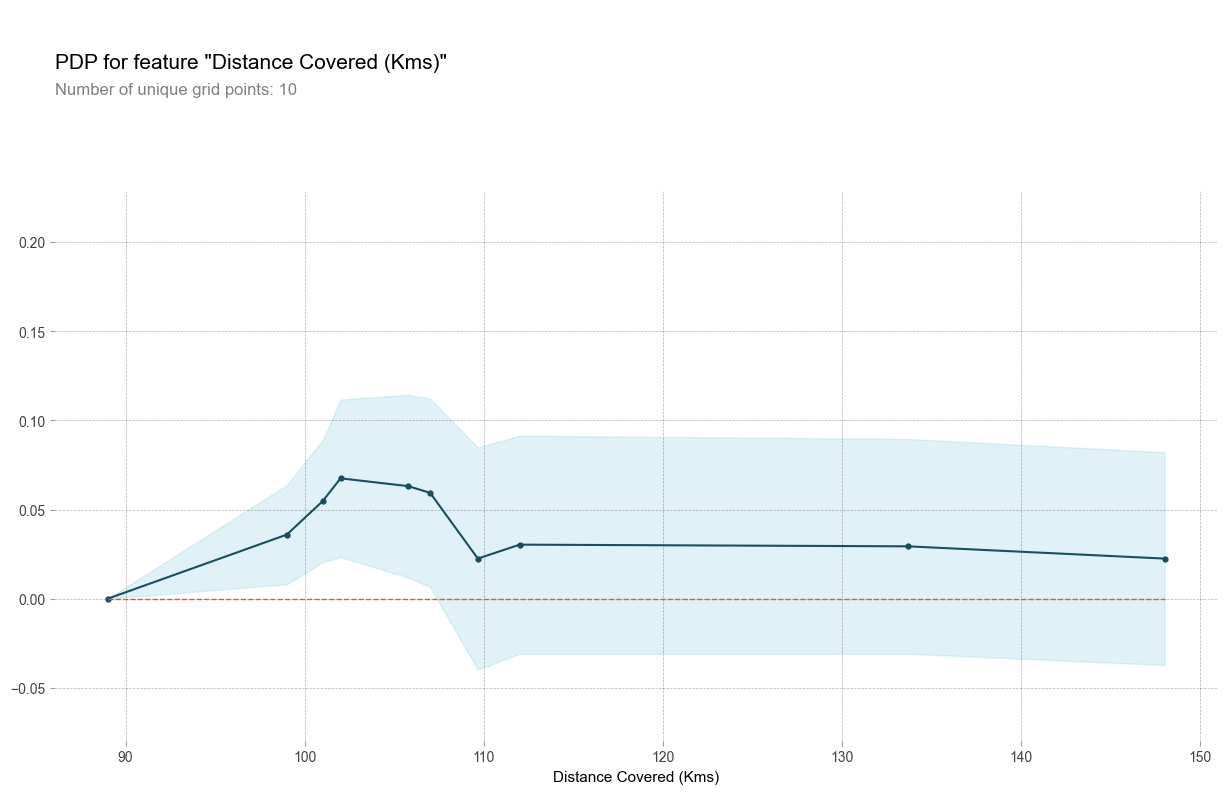

In [11]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_x, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_x, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

<font color=red>Interpretation:</font> 
This model says that it is more likely to win 'Man of the Match', if the players run a total of 100km during the game. More running causes lower predictions.
Generally spoken, the smoother shape of this curve seems to be more plausible than the step function from the decision tree model. 
However, this data set is far too small. Be very careful in when interpreting any model.

## 2D Partial Depedence Plot

Now, plotting the PDP for two features can be done by using the **pdp_interact** and **pdp_interact_plot** functions.

First, switch back to the simple decision tree model.

In [12]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_x, train_y)

In [13]:
feature_to_plot

'Distance Covered (Kms)'

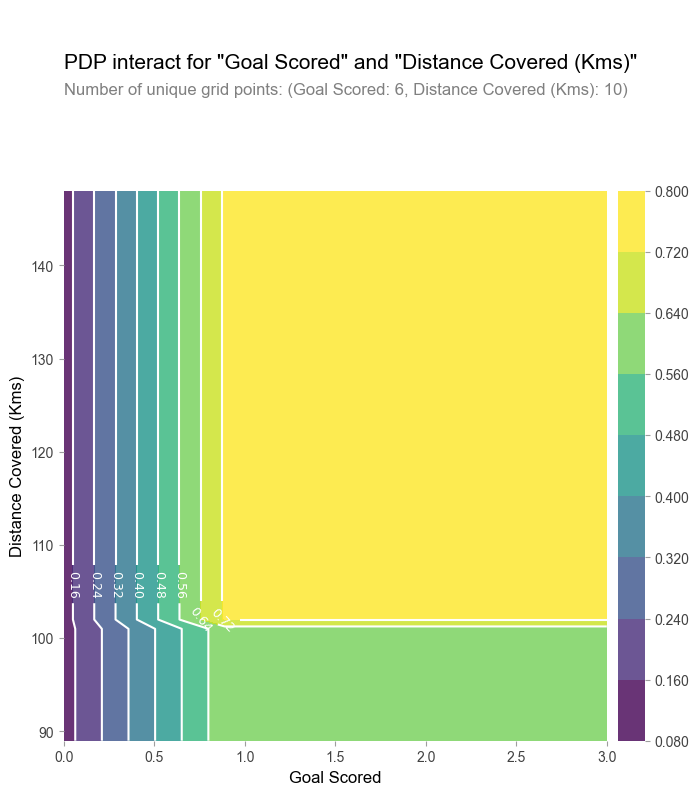

In [14]:
# Similar to previous PDP plot.
# However, use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot

# plot PDP for the two features
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
feature_to_plot = feature_to_plot

inter1 = pdp.pdp_interact(model=tree_model, dataset=val_x, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show( )

<font color=red>Interpretation:</font> 
This **2D PDP** shows predictions for any combination of **Goals Scored** and **Distance Covered (Kms)**.

For example, it seems to yield the highest predictions when a team scores at least one (1) goal and they run a total distance close to 100km. 
If the players score 0 goals, the covered distance does not matter. 

Try to see this by tracing through the decision tree with 0 goals!

But distance can impact predictions if the players score goals. 
Make sure you can see this from the 2D PDP. 
Can you find this pattern in the decision tree too?

### PART I
4. download an interesting data set from Kaggle and do the preprocessing.
5. change the classifier according to the data set. The more blackbox the better.
6. use PDP to identify the most relevant features explaining the target response of the data set.
7. comment your entire code and your findings.

Stroke 1 = True, Stroke 0 = False

In [15]:
#read in the data
stroke_df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
#decide on features, drop null values and define type as int
feature_names = stroke_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
feature_names = feature_names.dropna()
feature_names = feature_names.astype(int)

# split features and label
y = feature_names['stroke'].astype(bool)
x = feature_names.drop(['stroke'], axis = 1)

In [17]:
# split features and label
y = feature_names['stroke'].astype(bool)
x = feature_names.drop(['stroke'], axis = 1)

In [18]:
#use logistic regression as our classifier
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [19]:
features = [i for i in x.columns]

In [20]:
features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [21]:
#feature_names = stroke_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]


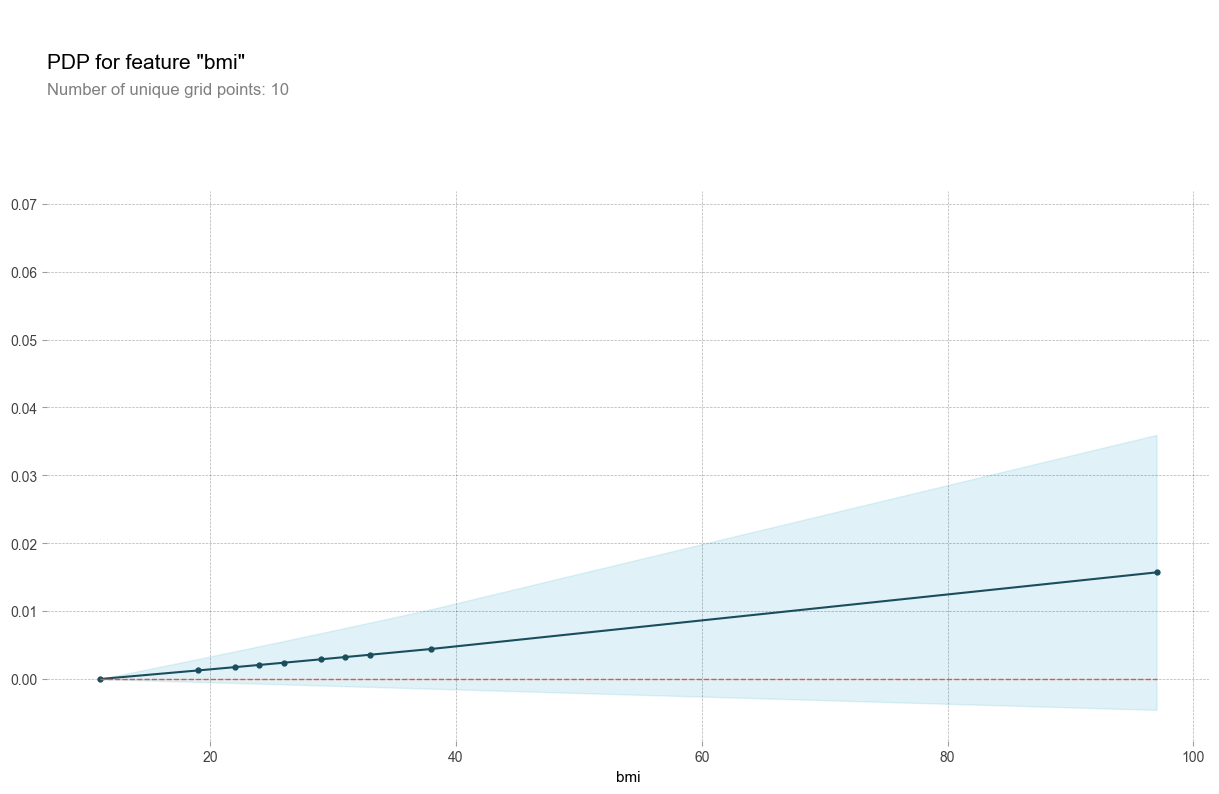

In [22]:
# Create the data to be plotted
feature_to_plot = 'bmi'
pdp_stroke = pdp.pdp_isolate(model=logreg, dataset=X_test, model_features=features, feature=feature_to_plot)
# plot PDP for feature 'BMI'
pdp.pdp_plot(pdp_stroke, 'bmi')
plt.show( )

In [23]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<font color=red>Interpretation:</font> 
This plot describes, that the probability to have a stroke rises almost linearly with a rising body mass index. However, the outlier of a bmi of 97 possibly skews the plot by a bit. 

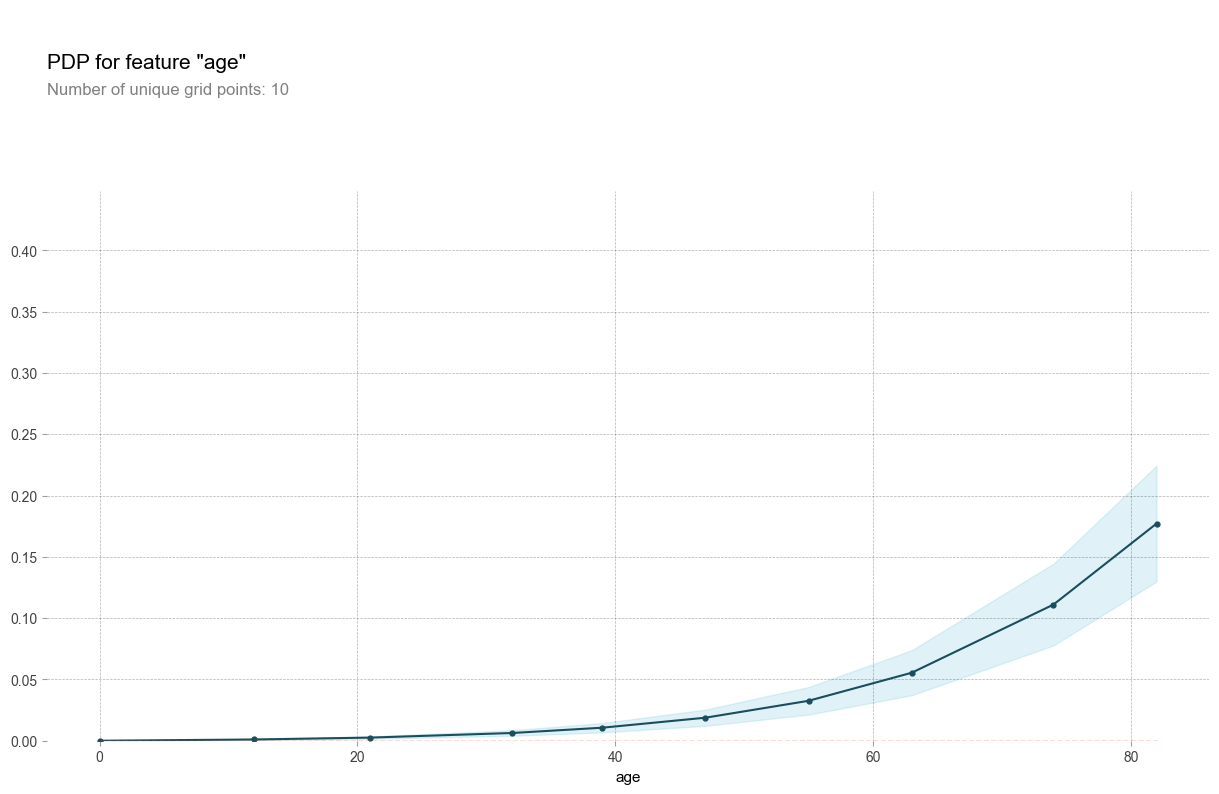

In [24]:
# Create the data to be plotted
feature_to_plot = 'age'
pdp_stroke = pdp.pdp_isolate(model=logreg, dataset=X_test, model_features=features, feature=feature_to_plot)
# plot PDP for feature 'BMI'
pdp.pdp_plot(pdp_stroke, 'age')
plt.show( )

<font color=red>Interpretation:</font> 
This plot says that it is more likely to get a stroke with rising age. This is common knowledge however quite interesting to observe. While the risk starts rising at around 20 years, one can observe an almost exponential curve.

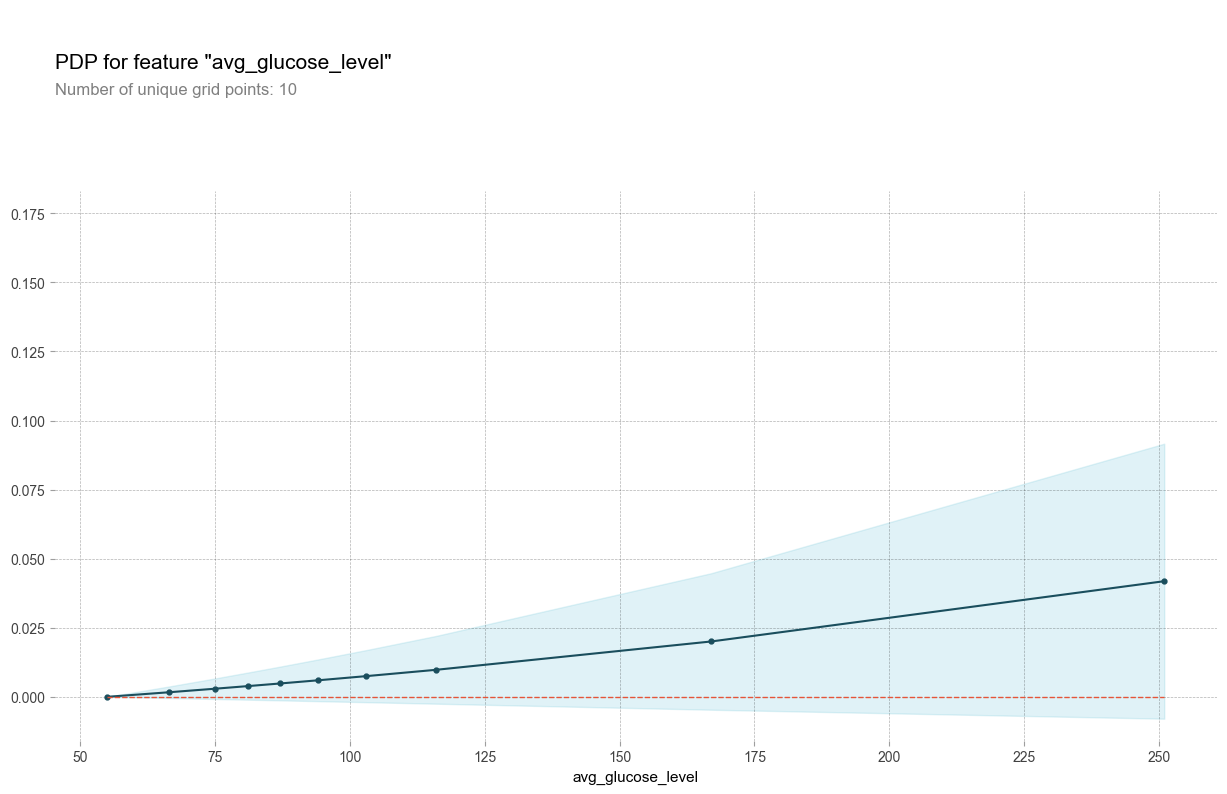

In [25]:
# Create the data to be plotted
feature_to_plot = 'avg_glucose_level'
pdp_stroke = pdp.pdp_isolate(model=logreg, dataset=X_test, model_features=features, feature=feature_to_plot)
# plot PDP for feature 'BMI'
pdp.pdp_plot(pdp_stroke, 'avg_glucose_level')
plt.show( )

<font color=red>Interpretation:</font> 
Once again, we can observe a rise in the probability to get a stroke with a higher average glucose level. 

Overall, the predictions and plots are quite easy to understand and do not show any interesting patterns compared to the example data. All attributes are contributing to a higher risk of stroke. Overall, the aspect "input features of interest are independent from the complement features and this assumption is often violated in practice." can not be followed wit the stroke data.

### Using PDP on two features

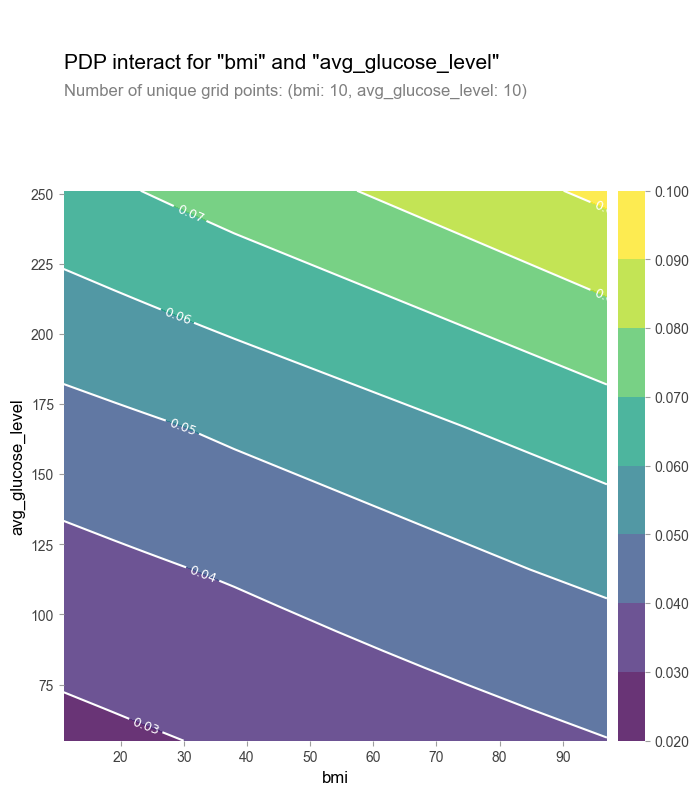

In [26]:
# pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot

# plot PDP for the two features
features_to_plot = ['bmi', 'avg_glucose_level']

inter1 = pdp.pdp_interact(model=logreg, dataset=X_test, model_features=features, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show( )

<font color=red>Interpretation:</font> By using the 2d pdp plot, we can observe that the possibility to have a stroke rises with higher bmi and glucose levels. Since the bars are tilted to the bottom right, we can conclude that both variables have an impact on the stroke possibility. A person can be thin and have a quite high stroke possibility with a high glucose level. A comparably high bmi and low glucose levels also leads to an increased risk. Generally, the avg_glucose_level has a much higher impact.

To gain additional information about mulitcollinearity, a heatmap is used.

<AxesSubplot: >

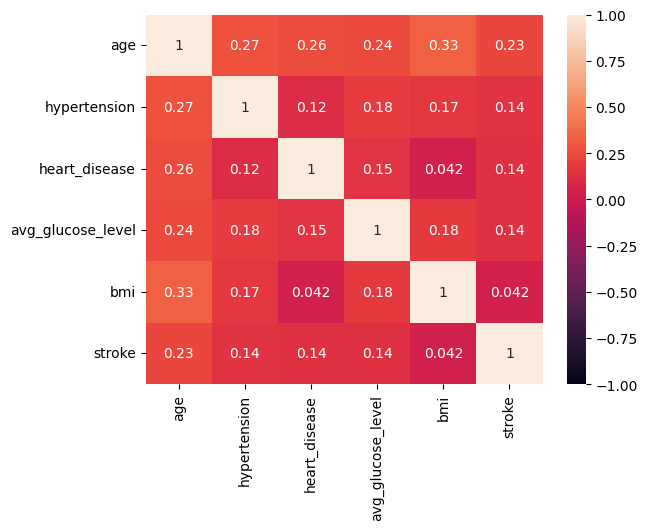

In [27]:
sns.heatmap(feature_names.corr(), vmin = -1, vmax = 1, annot=True)

We can observe a few patterns, however a clear corelation is not observeable.

# <font color="ce33ff">PART II (Individual Conditional Expectation)</font>

ICE is also a model-agnostic method that can be applied to any model. 
In fact, it is basically the same concept as PDP but is different in that it displays the marginal effect of feature(s) 
for each instance instead of calculating the average effect in a overall data context as the PDP does. 
Thus, it can understood as the equivalent to a PDP for individual data instances. 
Visually, an ICE plot displays the dependence of the prediction on a feature for each instance separately, 
resulting in one line per instance.

There are multiple packages and libraries that can be used to compute ICE plots. 

The PartialDependenceDisplay function in the sklearn.inspection module, the PyCEBox package and H2O package’s ice_plot function are available.

Let’s take a look at an example in Sklearn’s documentation (https://scikit-learn.org/stable/modules/partial_dependence.html).

## Imports
Import all necessary python utilities.

In [28]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
# make sure you have installed scikit-learn of version > 1.0 
# since the method from_estimator() is not available in previous versions
from sklearn.inspection import PartialDependenceDisplay

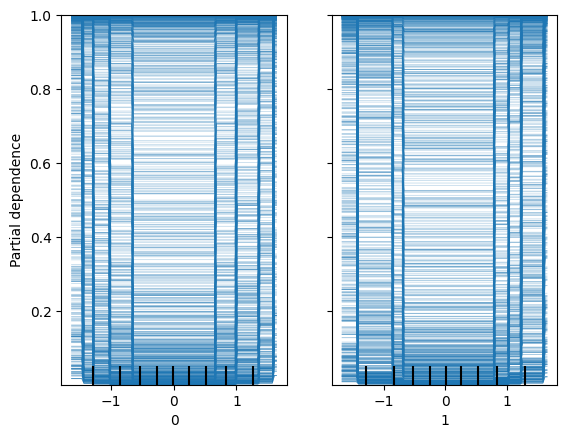

In [29]:
# Read some inbuild data set as part of the Sklearn data sets being offered
# To get more information on the data set please refer to 
''' https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html '''

x, y = make_hastie_10_2(random_state=0) # set a seed with random_state
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x, y)
features2 = [0, 1]
PartialDependenceDisplay.from_estimator(clf, x, features2, kind='individual')

It is evident that, similar to PDPs, ICE curves can be computed only after a model has been trained.

If you specify the parameter kind='both', then a PDP and an ICE curve is plotted in one canvas at the same time. 
This will be meaningful when looking at both, the marginal average effect and marginal individual effects at once!

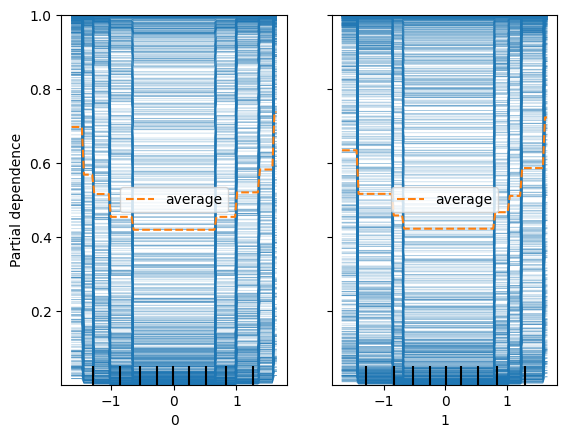

In [30]:
PartialDependenceDisplay.from_estimator(clf, x, features2, kind='both')

### PART II
8. use the data set and the classifer from steps 4 and 5
9. plot ICE curves with parameter (kind='both') 
10. comment your entire code and your findings.

In [31]:
#decide on features, drop null values and define type as int
feature_names = stroke_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
feature_names = feature_names.dropna()
feature_names = feature_names.astype(int)

# split features and label
y = feature_names['stroke'].astype(bool)
x = feature_names.drop(['stroke'], axis = 1)

#use logistic regression as our classifier
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

features = [i for i in x.columns]

In [32]:
features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

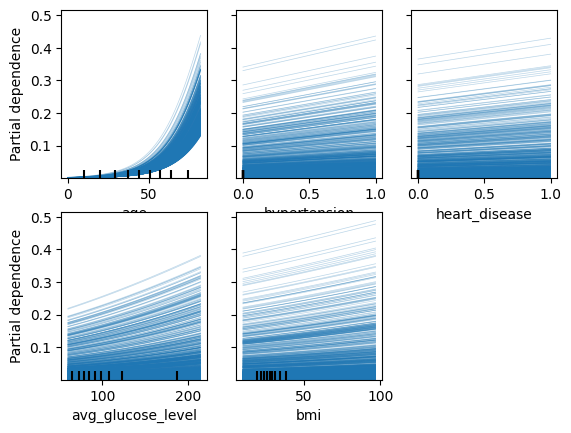

In [33]:
# Read some inbuild data set as part of the Sklearn data sets being offered
# To get more information on the data set please refer to 
''' https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html '''

PartialDependenceDisplay.from_estimator(logreg, x, features, kind='individual')

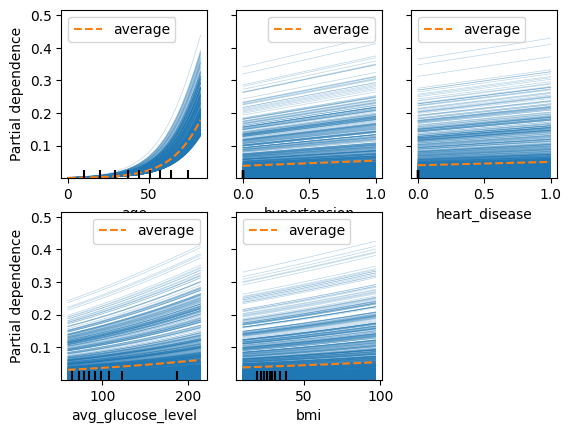

In [34]:
PartialDependenceDisplay.from_estimator(logreg, x, features, kind='both')

When analyzing the plots, a positive association towards strokes can be observed. 
The first plot can be interpreted as: generally, as the age rises, the partial dependence (functional relationship) towards having a stroke goes up.
Besides from all plots showing a rising trend, it is especially visible for the Age having an almost exponential pattern. This is understandable, since strokes are one of the most common forms of death in older ages. However, the positive associations in hypertension and bmi are also important observations.

When analyzing the plots, one has to observe the black dashes to not be fooled by the blue and average curve. While age is evenly distributed, we can observe outliers in avg_glucose_level and the bmi.However the lines for hyptertension and heart disease are only 0 and 1, therefore not optimally suited for PDP.